In [1]:
import pandas as pd


df = pd.read_csv('diabetes.csv')


print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Get the number of records
num_records = df.shape[0]

print("Number of records in the Pima Indian Diabetes Dataset:", num_records)


Number of records in the Pima Indian Diabetes Dataset: 768


In [4]:
# Calculate the maximum age
max_age = df['Age'].max()

print("Maximum age of records in the Pima Indian Diabetes Dataset:", max_age)

Maximum age of records in the Pima Indian Diabetes Dataset: 81


In [5]:
# Calculate the minimum age
min_age = df['Age'].min()

print("Minimum age of records in the Pima Indian Diabetes Dataset:", min_age)

Minimum age of records in the Pima Indian Diabetes Dataset: 21


In [6]:
# Calculate the number of missing values in the "pregnancies" column
missing_pregnancies = df['Pregnancies'].isnull().sum()

# Display the number of missing values in the "pregnancies" column
print("Missing values in the 'pregnancies' column:", missing_pregnancies)


Missing values in the 'pregnancies' column: 0


In [7]:
# Calculate the number of missing values in the "Glucose" column
missing_Glucose = df['Glucose'].isnull().sum()

# Display the number of missing values in the "Glucose" column
print("Missing values in the 'Glucose' column:", missing_Glucose)

Missing values in the 'Glucose' column: 0


In [8]:
# Calculate the number of missing values in the "Blood Pressure" column
missing_BloodPressure = df['BloodPressure'].isnull().sum()

# Display the number of missing values in the "Blood Pressure" column
print("Missing values in the 'Blood Pressure' column:", missing_BloodPressure)

Missing values in the 'Blood Pressure' column: 0


In [9]:
# Calculate the number of missing values in the "Skin Thickness" column
missing_SkinThickness = df['SkinThickness'].isnull().sum()

# Display the number of missing values in the "SkinThickness" column
print("Missing values in the 'SkinThickness' column:", missing_SkinThickness)

Missing values in the 'SkinThickness' column: 0


In [10]:
# Calculate the number of missing values in the "Insulin" column
missing_Insulin = df['Insulin'].isnull().sum()

# Display the number of missing values in the "Inslin" column
print("Missing values in the 'Insulin' column:", missing_Insulin)

Missing values in the 'Insulin' column: 0


In [11]:
# Calculate the number of missing values in the "BMI" column
missing_BMI = df['BMI'].isnull().sum()

# Display the number of missing values in the "BMI" column
print("Missing values in the 'BMI' column:", missing_BMI)

Missing values in the 'BMI' column: 0


In [12]:

# Calculate the number of missing values in the "DiabetesPedigreeFunction" column
missing_DiabetesPedigreeFunction = df['DiabetesPedigreeFunction'].isnull().sum()

# Display the number of missing values in the "DiabetesPedigreeFunction" column
print("Missing values in the 'DiabetesPedigreeFunction' column:", missing_DiabetesPedigreeFunction)

Missing values in the 'DiabetesPedigreeFunction' column: 0


In [13]:
# Calculate the number of missing values in the "Age" column
missing_Age = df['Age'].isnull().sum()

# Display the number of missing values in the "Age" column
print("Missing values in the 'Age' column:", missing_Age)

Missing values in the 'Age' column: 0


In [14]:
# Calculate the number of missing values in the "Outcome" column
missing_Outcome = df['Outcome'].isnull().sum()

# Display the number of missing values in the "Outcome" column
print("Missing values in the 'Outcome' column:", missing_Outcome)

Missing values in the 'Outcome' column: 0


In [15]:
import numpy as np
# Replace zero values with NaN
df.replace(0, np.nan, inplace=True)

# Now, all zero values in the DataFrame have been replaced with NaN



In [16]:
# Calculate the total number of NaN values
total_nan_values = df.isna().sum().sum()
print("Total NaN values in the dataset:", total_nan_values)


Total NaN values in the dataset: 1263


In [17]:
# Calculate the number of NaN values in each column
nan_values_per_column = df.isna().sum()
print("NaN values in each column:")
print(nan_values_per_column)


NaN values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [38]:

# Split the dataset into individuals with and without diabetes
diabetes_positive = df[df['Outcome'] == 1]
diabetes_negative = df[df['Outcome'] == 0]

# Calculate the proportion of individuals with diabetes for each age group
age_groups_positive = diabetes_positive.groupby(pd.cut(diabetes_positive['Age'], bins=range(0, 101, 10))).size()
age_groups_negative = diabetes_negative.groupby(pd.cut(diabetes_negative['Age'], bins=range(0, 101, 10))).size()

# Combine the counts of individuals with and without diabetes for each age group
age_groups_combined = pd.concat([age_groups_positive, age_groups_negative], axis=1)
age_groups_combined.columns = ['Diabetes Positive', 'Diabetes Negative']

# Calculate the proportion of individuals with diabetes for each age group
age_groups_combined['Diabetes Proportion'] = age_groups_combined['Diabetes Positive'] / (age_groups_combined['Diabetes Positive'] + age_groups_combined['Diabetes Negative'])

# Find the age group with the highest proportion of individuals with diabetes
max_prone_age_group = age_groups_combined['Diabetes Proportion'].idxmax()

print("Age group most prone to diabetes:", max_prone_age_group)


Age group most prone to diabetes: (50, 60]


In [39]:

# Filter the dataset to select only  diabetic females
female_data = df[df['Outcome'] == 1]

# Define age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Define age bins as needed

# Count the number of females in each age group
female_counts = female_data.groupby(pd.cut(female_data['Age'], age_bins)).size()

print("Number of females in different age groups with diabetes:")
print(female_counts)


Number of females in different age groups with diabetes:
Age
(20, 30]    90
(30, 40]    76
(40, 50]    64
(50, 60]    31
(60, 70]     7
(70, 80]     0
(80, 90]     0
dtype: int64


In [40]:

# Filter the dataset to select females without diabetes
female_data = df[df['Outcome'] == 0]
# Define age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Define age bins as needed

# Count the number of females in each age group
female_counts = female_data.groupby(pd.cut(female_data['Age'], age_bins)).size()

print("Number of females in different age groups without diabetes:")
print(female_counts)


Number of females in different age groups without diabetes:
Age
(20, 30]    327
(30, 40]     81
(40, 50]     49
(50, 60]     23
(60, 70]     18
(70, 80]      1
(80, 90]      1
dtype: int64


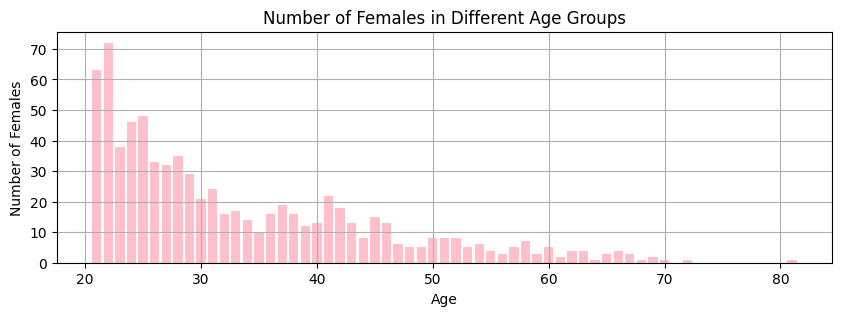

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of females in each age group
female_counts = df['Age'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10,3))
plt.bar(female_counts.index, female_counts.values, color='pink')

# Adding labels and title
plt.title('Number of Females in Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Females')

# Displaying the plot
plt.grid(True)
plt.show()


Correlation coefficient between Pregnancies and Outcome: 0.22189815303398613


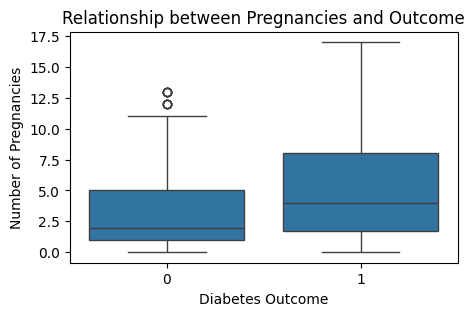

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Analysis between Pregnancies and Outcome
correlation = df['Pregnancies'].corr(df['Outcome'])
print("Correlation coefficient between Pregnancies and Outcome:", correlation)

# Visualization
plt.figure(figsize=(5,3))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Number of Pregnancies')
plt.title('Relationship between Pregnancies and Outcome')
plt.show()


Correlation coefficient between Glucose and Outcome: 0.46658139830687295


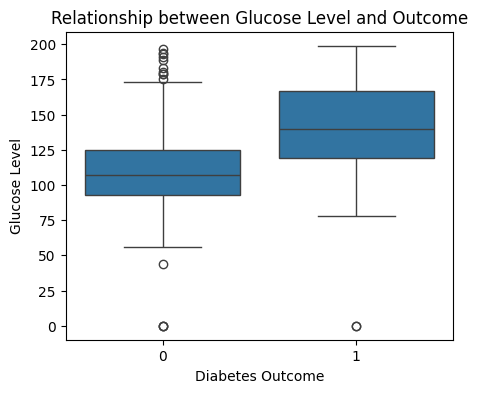

In [45]:

# Correlation Analysis between Glucose Level and Outcome
correlation = df['Glucose'].corr(df['Outcome'])
print("Correlation coefficient between Glucose and Outcome:", correlation)

# Visualization
plt.figure(figsize=(5,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.title('Relationship between Glucose Level and Outcome')
plt.show()


Correlation coefficient between Blood Pressure and Outcome: 0.0650683595503327


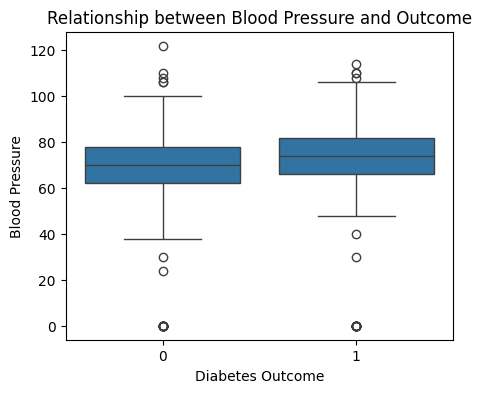

In [47]:

# Correlation Analysis between Blood Pressure and Outcome
correlation = df['BloodPressure'].corr(df['Outcome'])
print("Correlation coefficient between Blood Pressure and Outcome:", correlation)

# Visualization
plt.figure(figsize=(5,4))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.title('Relationship between Blood Pressure and Outcome')
plt.show()


In [26]:
# Calculate the minimum and maximum values of skin thickness
min_skin_thickness = df['SkinThickness'].min()
max_skin_thickness = df['SkinThickness'].max()

print("Minimum Skin Thickness:", min_skin_thickness)
print("Maximum Skin Thickness:", max_skin_thickness)


Minimum Skin Thickness: 7.0
Maximum Skin Thickness: 99.0


Correlation coefficient between Skin Thickness and Outcome: 0.0747522319183194


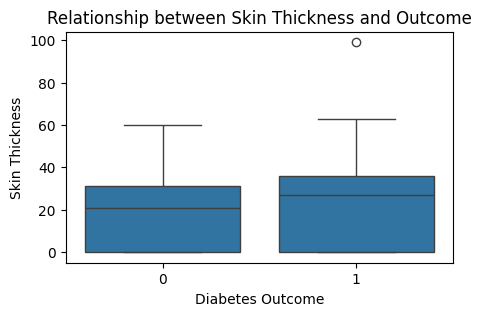

In [58]:

# Correlation Analysis between Skin Thickness and Outcome
correlation = df['SkinThickness'].corr(df['Outcome'])
print("Correlation coefficient between Skin Thickness and Outcome:", correlation)

# Visualization
plt.figure(figsize=(5,3))
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Skin Thickness')
plt.title('Relationship between Skin Thickness and Outcome')
plt.show()


Correlation coefficient between Insulin and Outcome: 0.13054795488404794


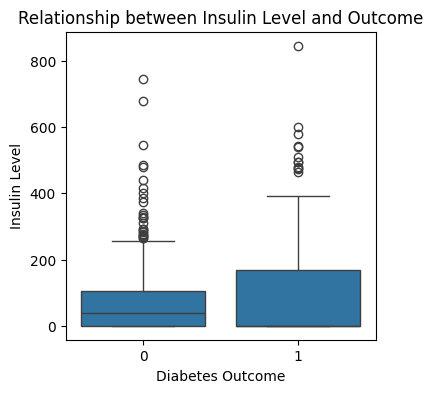

In [66]:

# Correlation Analysis between Insulin and Outcome
correlation = df['Insulin'].corr(df['Outcome'])
print("Correlation coefficient between Insulin and Outcome:", correlation)

# Visualization
plt.figure(figsize=(4,4))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Insulin Level')
plt.title('Relationship between Insulin Level and Outcome')
plt.show()


Correlation coefficient between BMI and Outcome: 0.29269466264444494


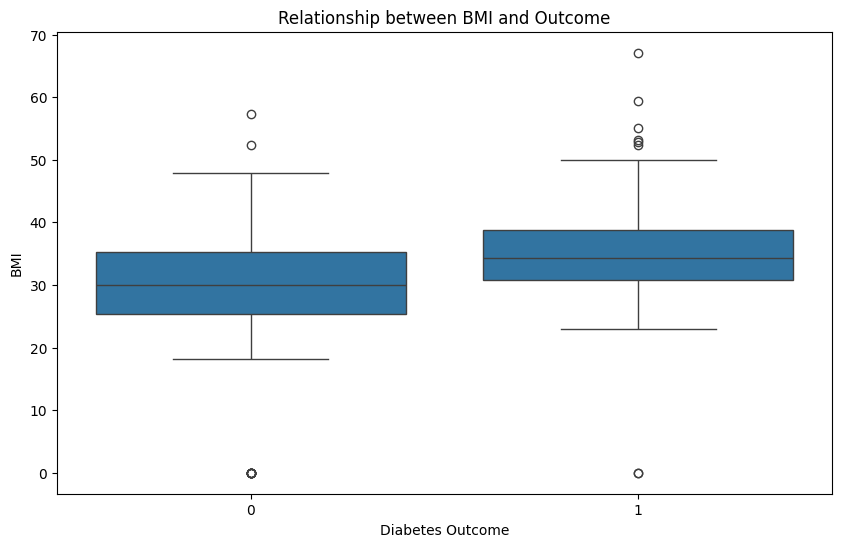

In [59]:

# Correlation Analysis  between BMI and Outcome
correlation = df['BMI'].corr(df['Outcome'])
print("Correlation coefficient between BMI and Outcome:", correlation)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Outcome')
plt.show()


Correlation coefficient between Diabetes Pedigree Function and Outcome: 0.1738440656529596


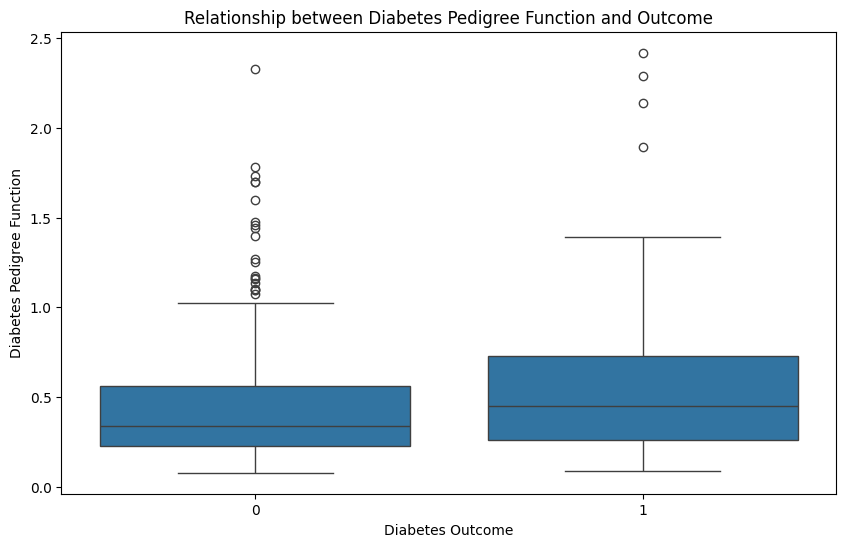

In [67]:

# Correlation Analysis between Diabetes Pedigree Function and Outcome
correlation = df['DiabetesPedigreeFunction'].corr(df['Outcome'])
print("Correlation coefficient between Diabetes Pedigree Function and Outcome:", correlation)

# Logistic Regression (optional)
# You can perform logistic regression to model the relationship between DPF and Outcome using libraries like scikit-learn.

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Relationship between Diabetes Pedigree Function and Outcome')
plt.show()


Correlation coefficient between Age and Outcome: 0.23835598302719754


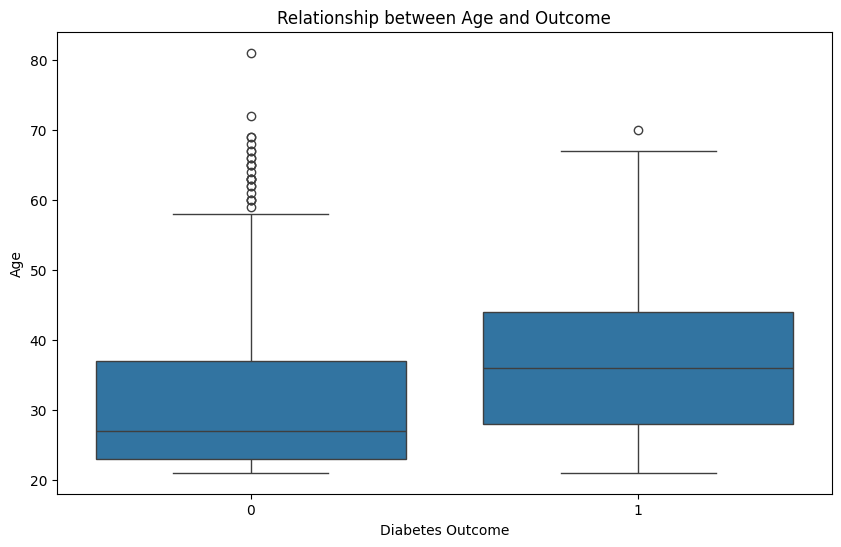

In [62]:

# Correlation Analysis between Age and Outcome
correlation = df['Age'].corr(df['Outcome'])
print("Correlation coefficient between Age and Outcome:", correlation)

# Logistic Regression (optional)
# You can perform logistic regression to model the relationship between Age and Outcome using libraries like scikit-learn.

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.title('Relationship between Age and Outcome')
plt.show()


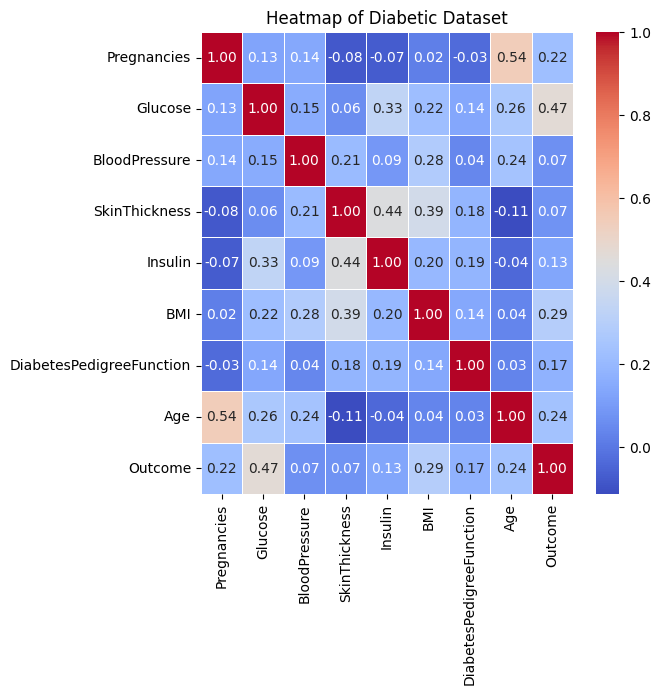

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Diabetic Dataset')
plt.show()


Correlation between Glucose and Insulin: 0.581186208912165


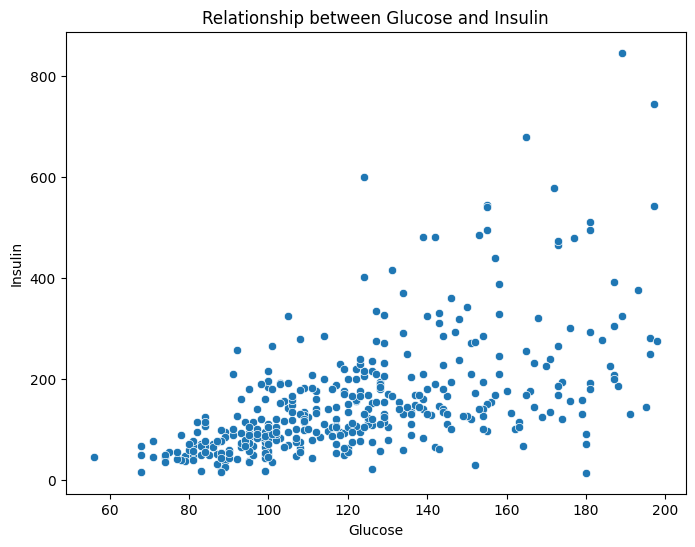

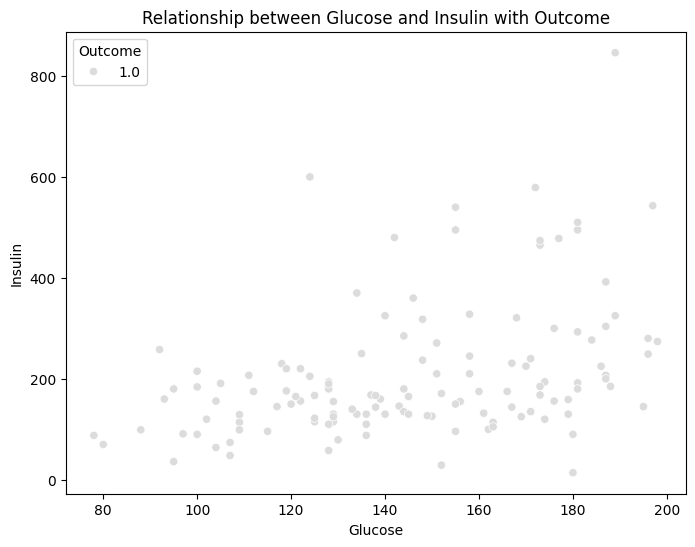

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Correlation Analysis between Glucose and Insulin
glucose_insulin_corr = df['Glucose'].corr(df['Insulin'])
print("Correlation between Glucose and Insulin:", glucose_insulin_corr)

# Visualization: Scatter plot for Glucose vs. Insulin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Relationship between Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

# Visualization: Scatter plot for Glucose vs. Insulin with Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df, palette='coolwarm')
plt.title('Relationship between Glucose and Insulin with Outcome')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(title='Outcome')
plt.show()


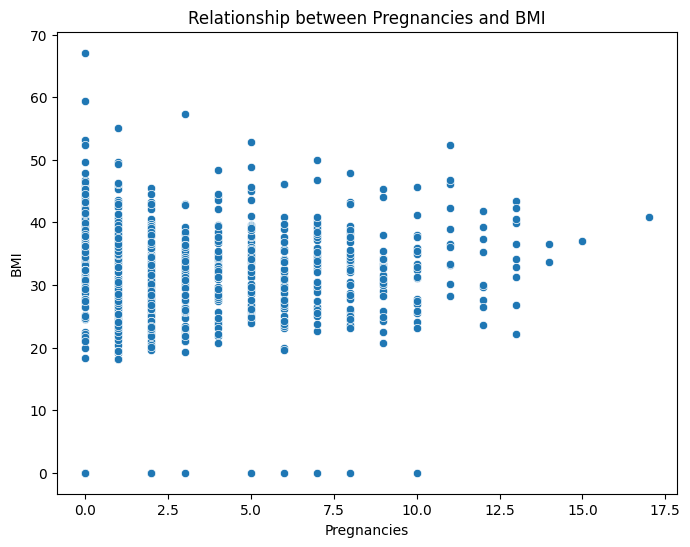

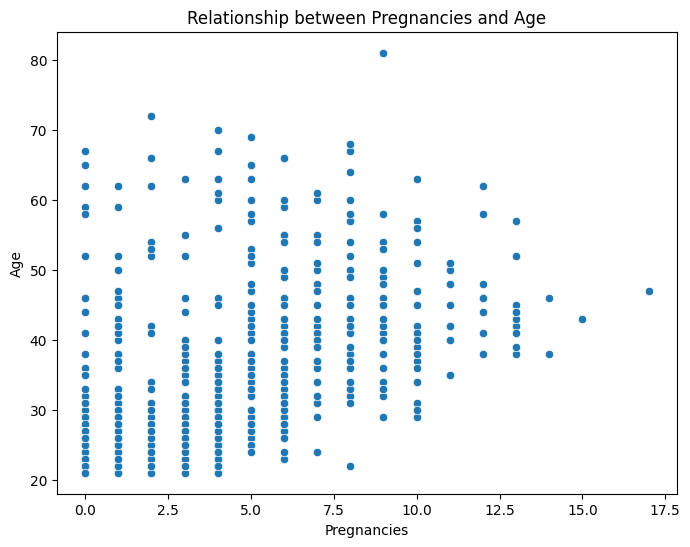

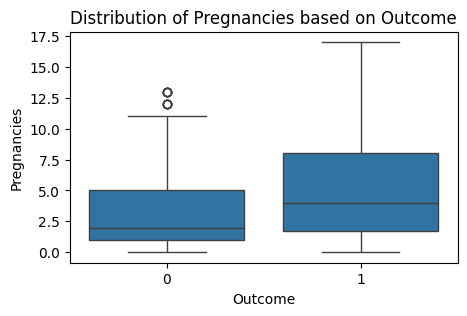

In [64]:
# Visualization: Scatter plot for Pregnancies vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pregnancies', y='BMI', data=df)
plt.title('Relationship between Pregnancies and BMI')
plt.xlabel('Pregnancies')
plt.ylabel('BMI')
plt.show()

# Visualization: Scatter plot for Pregnancies vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pregnancies', y='Age', data=df)
plt.title('Relationship between Pregnancies and Age')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()

# Visualization: Box plot for Pregnancies with Outcome
plt.figure(figsize=(5,3))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Distribution of Pregnancies based on Outcome')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.show()


In [ ]:


# Count the number of patients who are diabetic (Outcome == 1)
diabetic_patients = df[df['Outcome'] == 1]
num_diabetic_patients = diabetic_patients.shape[0]

print("Number of patients who are diabetic:", num_diabetic_patients)


Number of patients who are diabetic: 268


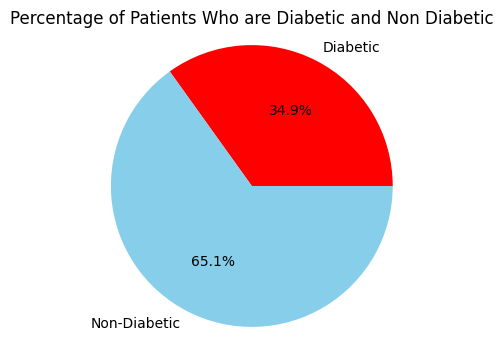

In [46]:


# Calculate the total number of patients
total_patients = df.shape[0]

# Calculate the number of patients who are diabetic (Outcome == 1)
diabetic_patients = df[df['Outcome'] == 1]
num_diabetic_patients = diabetic_patients.shape[0]

# Calculate the percentage of patients who are diabetic
percentage_diabetic = (num_diabetic_patients / total_patients) * 100

# Plot a pie chart
labels = ['Diabetic', 'Non-Diabetic']
sizes = [percentage_diabetic, 100 - percentage_diabetic]
colors = ['red', 'skyblue']


plt.figure(figsize=(4,4))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Percentage of Patients Who are Diabetic and Non Diabetic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Filter the dataset for diabetic patients with age between 20 and 45
diabetic_patients = df[(df['Outcome'] == 1) & (df['Age'] >= 20) & (df['Age'] <= 45)]

# Calculate the total number of diabetic patients with age between 20 and 45
total_diabetic_patients = diabetic_patients.shape[0]
print(total_diabetic_patients)

210


In [ ]:


# Filter the dataset for diabetic patients with age between 20 and 45
diabetic_patients = df[(df['Outcome'] == 1) & (df['Age'] >= 20) & (df['Age'] <= 45)]

# Calculate the total number of diabetic patients with age between 20 and 45
total_diabetic_patients = diabetic_patients.shape[0]

# Calculate the total number of diabetic patients
total_diabetic = df[df['Outcome'] == 1].shape[0]

# Calculate the percentage of patients who are diabetic and have age between 20 and 45
percentage_diabetic_age_20_to_45 = (total_diabetic_patients / total_diabetic) * 100

print("Percentage of diabetic patients with age between 20 to 45:", percentage_diabetic_age_20_to_45)


Percentage of diabetic patients with age between 20 to 45: 78.35820895522389


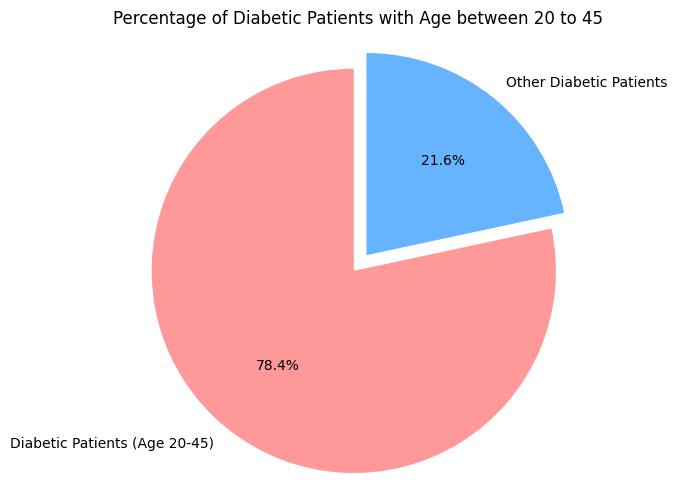

In [ ]:

# Plot a pie chart
labels = ['Diabetic Patients (Age 20-45)', 'Other Diabetic Patients']
sizes = [percentage_diabetic_age_20_to_45, 100 - percentage_diabetic_age_20_to_45]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetic Patients with Age between 20 to 45')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
